In [6]:
import network_diffusion as nd
import networkx as nx

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ICM on Multilayer Network

In [8]:
# create network
net = nd.MultilayerNetwork.from_mpx("/Users/michal/Development/bdma-experiments/data/aucs.mpx")

# we can create it as well from nx graph
# layer = nx.les_miserables_graph()
# net2 = nd.MultilayerNetwork.from_nx_layer(layer, ["l1", "l2", "l3"])

# see details of the network
# print(net)

In [9]:
# create an instance of Independent Cascade Model
model = nd.models.MICModel(
    seeding_budget=[95, 5, 0],
    seed_selector=nd.seeding.DegreeCentralitySelector(),
    protocol="OR",
    probability=.5,
)

print(model)

Multilayer Independent Cascade Model
--------------------------------------------
compartmental model
--------------------------------------------
processes, their states and initial sizes:
	'MICM': [0:95%, 1:5%, -1:0%]
--------------------------------------------
process 'MICM' transitions with nonzero weight:
	from 0 to 1 with probability 0.5 and constrains []
	from 1 to -1 with probability 1 and constrains []
seed selection method
--------------------------------------------
	degree centrality choice
auxiliary parameters
--------------------------------------------
	protocol: _protocol_or
	inactive state abbreviation: 0
	active state abbreviation: 1
	activated state abbreviation: -1


In [10]:
# experiment
experiment = nd.Simulator(model, net)
logs = experiment.perform_propagation(10)

In [11]:
# detailed logs from each simulation step
logs._local_stats

{0: [{'layer_name': 'facebook', 'node_name': 'U4', 'new_state': '1'},
  {'layer_name': 'lunch', 'node_name': 'U4', 'new_state': '1'},
  {'layer_name': 'leisure', 'node_name': 'U4', 'new_state': '1'},
  {'layer_name': 'work', 'node_name': 'U4', 'new_state': '1'},
  {'layer_name': 'facebook', 'node_name': 'U67', 'new_state': '1'},
  {'layer_name': 'lunch', 'node_name': 'U67', 'new_state': '1'},
  {'layer_name': 'leisure', 'node_name': 'U67', 'new_state': '1'},
  {'layer_name': 'work', 'node_name': 'U67', 'new_state': '1'},
  {'layer_name': 'facebook', 'node_name': 'U91', 'new_state': '1'},
  {'layer_name': 'lunch', 'node_name': 'U91', 'new_state': '1'},
  {'layer_name': 'coauthor', 'node_name': 'U91', 'new_state': '1'},
  {'layer_name': 'leisure', 'node_name': 'U91', 'new_state': '1'},
  {'layer_name': 'work', 'node_name': 'U91', 'new_state': '1'},
  {'layer_name': 'facebook', 'node_name': 'U123', 'new_state': '0'},
  {'layer_name': 'lunch', 'node_name': 'U123', 'new_state': '0'},
  {'la

In [12]:
# bulk logs from entire simulation that concatenate states of agents per each layer of the network
logs._global_stats

[{'facebook': (('0', 29), ('1', 3)),
  'lunch': (('0', 57), ('1', 3)),
  'coauthor': (('0', 24), ('1', 1)),
  'leisure': (('0', 44), ('1', 3)),
  'work': (('0', 57), ('1', 3))},
 {'facebook': (('0', 10), ('1', 19), ('-1', 3)),
  'lunch': (('0', 26), ('1', 31), ('-1', 3)),
  'coauthor': (('0', 11), ('1', 13), ('-1', 1)),
  'leisure': (('0', 21), ('1', 23), ('-1', 3)),
  'work': (('0', 26), ('1', 31), ('-1', 3))},
 {'facebook': (('1', 9), ('-1', 22), ('0', 1)),
  'lunch': (('1', 22), ('-1', 34), ('0', 4)),
  'coauthor': (('1', 9), ('-1', 14), ('0', 2)),
  'leisure': (('1', 18), ('0', 3), ('-1', 26)),
  'work': (('1', 22), ('-1', 34), ('0', 4))},
 {'facebook': (('-1', 31), ('1', 1)),
  'lunch': (('-1', 56), ('1', 3), ('0', 1)),
  'coauthor': (('-1', 23), ('1', 2)),
  'leisure': (('-1', 44), ('1', 3)),
  'work': (('-1', 56), ('1', 3), ('0', 1))},
 {'facebook': (('-1', 32),),
  'lunch': (('-1', 59), ('0', 1)),
  'coauthor': (('-1', 25),),
  'leisure': (('-1', 47),),
  'work': (('-1', 59), (

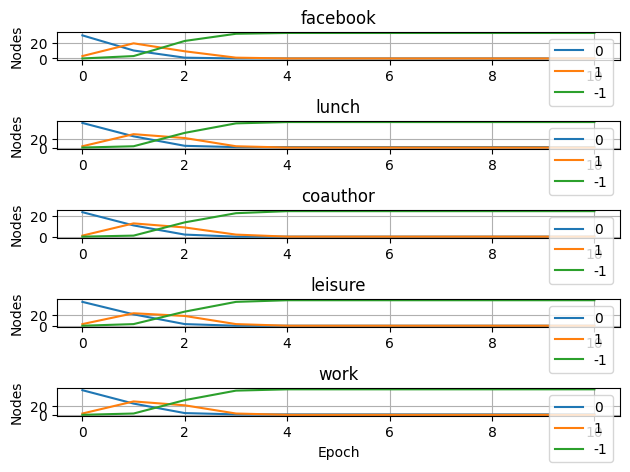

In [13]:
# we can also plot global state of agents in each network. Visualisation shows
# each layer, with epochs on X axis, number of nodes on Y axis
logs.plot()

## ICM on Temporal Network
The difference is that for static network we work on the same struture in each 
step of simulation. For temporal network, on each simulation step we change a 
snapshot.

In [14]:
# in our library a temporal network is a list of consecutive snapshots of a 
# multilayer network (that can be in eadge cas a single layer). we can create 
# it on many ways. here we will use networkx to generate a temporal graph:
net = nd.TemporalNetwork.from_nx_layers(
    [
        nx.erdos_renyi_graph(n=200, p=0.1),
        nx.erdos_renyi_graph(n=200, p=0.2),
        nx.erdos_renyi_graph(n=200, p=0.3),
        nx.erdos_renyi_graph(n=200, p=0.4),
        nx.erdos_renyi_graph(n=200, p=0.5),
        nx.erdos_renyi_graph(n=200, p=0.6),
        nx.erdos_renyi_graph(n=200, p=0.5),
        nx.erdos_renyi_graph(n=200, p=0.4),
        nx.erdos_renyi_graph(n=200, p=0.3),
    ]
)

# or CogSnet model:
# net = nd.TemporalNetwork.from_cogsnet(
#     "exponential",
#     5,
#     70,
#     0.3,
#     0.1,
#     3600,
#     "network_diffusion/tests/data/cogsnet_data.csv",
#     ";",
# )

print(f"number of snapshots: {len(net)}")
for snapshot in net:
    print(snapshot)

number of snapshots: 9
network parameters
--------------------------------------------
general parameters:
	number of layers: 1
	number of actors: 200

layer 'layer_0' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 200
	number of edges - 2044
	average degree - 20.44
	clustering coefficient - 0.1034
network parameters
--------------------------------------------
general parameters:
	number of layers: 1
	number of actors: 200

layer 'layer_0' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 200
	number of edges - 4096
	average degree - 40.96
	clustering coefficient - 0.2044
network parameters
--------------------------------------------
general parameters:
	number of layers: 1
	number of actors: 200

layer 'layer_0' parameters:
	graph type - <class 'networkx.classes.graph.Graph'>
	number of nodes - 200
	number of edges - 5946
	average degree - 59.46
	clustering coefficient - 0.2988
network parameters
----------------

In [15]:
# experiment
experiment = nd.Simulator(model, net)
logs = experiment.perform_propagation(15)

/Users/michal/Development/bdma-experiments/network_diffusion/simulator.py:71: UserWarning: Number of simulation epochs is higher than number of snaps - 1! Simulation will last for 8 epochs
  warnings.warn(


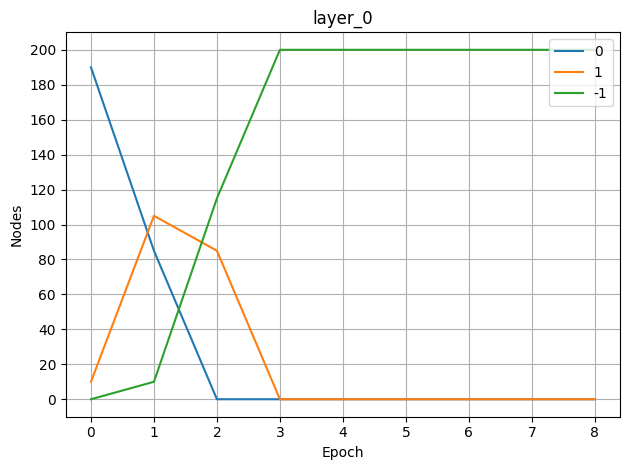

In [16]:
logs.plot()